<ipython-input-59-49b6ed973331>:21: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(label2rgb(mask_img, image=img2))


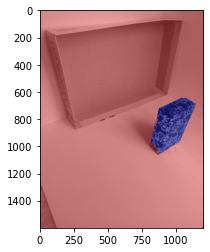

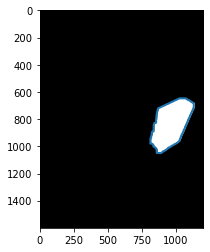

1

In [59]:
from imageio import imread, imsave
from skimage.color import rgb2gray, rgba2rgb
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.feature import canny
from skimage.morphology import binary_opening, binary_closing
from scipy.ndimage.morphology import binary_fill_holes
from skimage.color import label2rgb
from skimage import measure

name_file = 'data_pink3.jpg'

img = imread(name_file)
img2 = rgb2gray(img)

binary_img = binary_closing(canny(img2, sigma=2), selem=np.ones((6, 6))) #1.5;2
img_segment = binary_fill_holes(binary_img)
mask_img = binary_opening(img_segment, selem=np.ones((30, 30)))#16;25

plt.imshow(label2rgb(mask_img, image=img2))

# Find contours
contours_img = measure.find_contours(mask_img, 0.8)

# Display
fig, ax = plt.subplots()
ax.imshow(mask_img, cmap=plt.cm.gray)

for contour in contours_img:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()

len(contours_img)

blue =  [ 684.  1133.2]
yellow =  [980.  813.8]
red =  [ 646.8 1029. ]
green =  [1049.2  891. ]
242.20000000000005
37.200000000000045


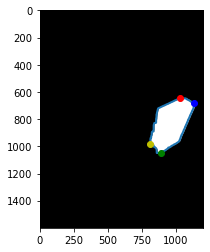

In [60]:
from matplotlib.patches import Rectangle

def find_size(contour, contours, mask_draw, number):
    max_x = contour[0]
    max_y = contour[0]
    min_x = contour[0]
    min_y= contour[0]
    for i in range(len(contour)):
        pair = contour[i]
        if max_x[1] < pair[1]:
            max_x = pair
        if min_x[1] > pair[1]:
            min_x = pair
        if min_y[0] < pair[0]:
            min_y = pair
        if max_y[0] > pair[0]:
            max_y = pair

    print("blue = ", max_x)
    print("yellow = ", min_x)
    print("red = ", max_y)
    print("green = ", min_y)
    
    fig, ax = plt.subplots()
    ax.imshow(mask_draw, cmap=plt.cm.gray)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.plot(max_x[1], max_x[0], 'bo') #max_y --> самая правая (max_x)
    ax.plot(min_x[1], min_x[0], 'yo') #min_y --> самая левая (min_x)
    ax.plot(max_y[1], max_y[0], 'ro') #min_x --> самая верхняя (max_y)
    ax.plot(min_y[1], min_y[0], 'go') #max_x --> самая нижнаяя (min_y)
    
    if number == 1:
        weidth = max_x[1] - min_y[1] #по х
        height = max_x[0] - max_y[0] #по у
    else:
        weidth = max_x[1] - min_y[1]
        height = min_y[0] - min_x[0] #по у
    return weidth, height, max_x, max_y, min_x, min_y

Weidth_B, Height_B, max_x_B, max_y_B, min_x_B, min_y_B= find_size(contours_img[0], contours_img, mask_img, 1)
print(Weidth_B)
print(Height_B)

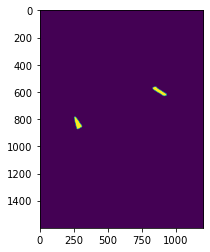

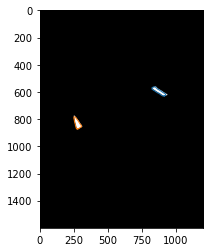

2

In [61]:
img_pink = cv2.imread(name_file)

PINK_MIN = np.array([150, 65, 65],np.uint8)
PINK_MAX = np.array([179, 255, 255],np.uint8)

hsv_img = cv2.cvtColor(img_pink,cv2.COLOR_BGR2HSV)

pink_markers = cv2.inRange(hsv_img, PINK_MIN, PINK_MAX)

mask_pink = binary_opening(pink_markers, selem=np.ones((10, 10)))

plt.imshow(mask_pink)

# Find contours
contours_pink = measure.find_contours(mask_pink, 0.8)

# Display
fig, ax = plt.subplots()
ax.imshow(pink_markers, cmap=plt.cm.gray)

for contour in contours_pink:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

plt.show()

len(contours_pink)

blue =  [615.  926.2]
yellow =  [579.  825.8]
red =  [562.8 839. ]
green =  [629.2 916. ]
blue =  [848.  306.2]
yellow =  [794.  250.8]
red =  [783.8 251. ]
green =  [872.2 280. ]
646.2
50.200000000000045


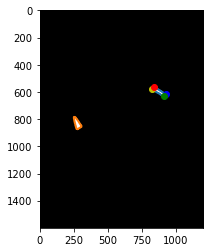

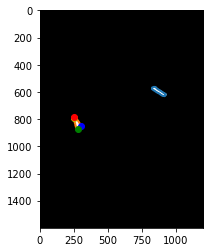

In [62]:
from matplotlib.patches import Rectangle

def find_size2(contour, contours, mask_draw):
    max_x = contour[0]
    max_y = contour[0]
    min_x = contour[0]
    min_y = contour[0]
    for i in range(len(contour)):
        pair = contour[i]
        if max_x[1] < pair[1]:
            max_x = pair
        if min_x[1] > pair[1]:
            min_x = pair
        if min_y[0] < pair[0]:
            min_y = pair
        if max_y[0] > pair[0]:
            max_y = pair

    print("blue = ", max_x) #min_y
    print("yellow = ", min_x) #max_y
    print("red = ", max_y) #max_x
    print("green = ", min_y) #min_x
    
    fig, ax = plt.subplots()
    ax.imshow(mask_draw, cmap=plt.cm.gray)
    contour = contours[0]
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.plot(max_x[1], max_x[0], 'bo') #max_y --> самая правая (max_x)
    ax.plot(min_x[1], min_x[0], 'yo') #min_y --> самая левая (min_x)
    ax.plot(max_y[1], max_y[0], 'ro') #min_x --> самая верхняя (max_y)
    ax.plot(min_y[1], min_y[0], 'go') #max_x --> самая нижнаяя (min_y)
    weidth = max_x[1] - min_y[1]
    height = min_y[0] - min_x[0] #по у
    
    return weidth, height, max_x, max_y, min_x, min_y

Weidth_A1, Height_A1, max_x_A1, max_y_A1, min_x_A1, min_y_A1 = find_size(contours_pink[0], contours_pink, mask_pink, 2)
Weidtht_A2, Height_A2, max_x_A2, max_y_A2, min_x_A2, min_y_A2 = find_size(contours_pink[1], contours_pink, mask_pink, 2)
d_11 = np.sqrt((max_x_A1[1] - max_y_A1[1])**2 + (max_x_A1[0] - max_y_A1[0])**2) #по у правильнее!!!

Weidth_A = max_x_A1[1] - min_y_A2[1] #по х
Height_A = Height_A1

print(Weidth_A)
print(Height_A)

In [63]:
def check(Weidth_A, Height_A, Weidht_B, Height_B):
    print("Check:")
    if Weidth_A >= Weidht_B:
        print("Weidth A >= weidth B")
    else:
        print("WARNING: Weidth A < weidth B")
    if Height_A >= Height_B:
        print("Height A >= height B")
    else:
        print("WARNING: Height A < height B")

check(Weidth_A, Height_A, Weidth_B, Height_B)

Check:
Weidth A >= weidth B
Height A >= height B
